## Word Vectors

In [1]:
# link: https://cp.sync.com/dl/ac715b810/7qp4nadn-avyhhjun-6saxinp7-2kbbh773

In [2]:
import numpy as np
import time

In [3]:
# Install/upgrade Gensim.
# !pip install gensim --upgrade

In [4]:
import gensim

In [5]:
t0 = time.time()

model = gensim.models.KeyedVectors.load_word2vec_format('lexvec.enwiki+newscrawl.300d.W.pos.vectors.gz')

print(time.time() - t0)

99.1110908985138


### What is a vector?

There are lots of ways to think about a vector.

In **physics**, vectors are arrows.

In **computer science** and **statistics**, vectors are columns of values, like one numeric Series in a DataFrame.

[This video](https://www.youtube.com/watch?v=fNk_zzaMoSs) does an exceptional job explaining vectors.

### So... what is a word vector?

A word vector, simply, is a way for us to represent words with vectors.

How have we technically already done this?
    
- CountVectorizer and TFIDFVectorizer. By representing each word as a new column in our DataFrame, we have represented words with vectors.


## A little math: the dot product

One thing we have spent lots of time talking about is whether or not two things are dependent or independent.
- We assume that our $Y$ variable depends on the $X$ variables in our models.
- We assume that our $X$ variables are independent of one another in linear models.
- We frequently assume that our observations are independent of one another.

Thus far, how have we detected if two columns/vectors are dependent or independent?
    
- The most common way for us to detect for dependence/independence is **correlation**. 
- If the correlation between two columns is far from zero, we say the two are dependent.
- If the correlation between two columns is close to zero, we say that the two are (linearly) independent.    


Geometrically, we say two vectors are independent if they are [orthogonal](https://en.wikipedia.org/wiki/Orthogonality) (perpendicular) to one another.

Are the cat and hat vectors independent of one another?
    
- Yes! 
    - They are orthogonal to one another.
    - They are perpendicular to one another. 
    - They form right angles. 
    - The three preceding bullet points are all equivalent: if one of them is true, then they will all be true and if one of them is false, then they will all be false.    

How can we detect this mathematically? **The dot product.**

The [dot product of two vectors](https://en.wikipedia.org/wiki/Dot_product) $\mathbf{a} = [a_1, a_2, \ldots, a_p]$ and $\mathbf{b} = [b_1, b_2, \ldots, b_p]$ is given by:

$$
\begin{eqnarray*}
\mathbf{a} \cdot \mathbf{b} &=& \sum_{i=1}^p a_i \times b_i \\
&=& (a_1 \times b_1) + (a_2 \times b_2) + \cdots + (a_p \times b_p) \\
\end{eqnarray*}
$$

Calculate the dot product of the vectors cat and hat. What is the value?</summary>
    
$$
\begin{eqnarray*}
\mathbf{cat} \cdot \mathbf{hat} &=& \sum_{i=1}^2 cat_i \times hat_i \\
&=& (cat_1 \times hat_1) + (cat_2 \times hat_2) \\
&=& (1 \times 0) + (0 \times 1) \\
&=& 0
\end{eqnarray*}
$$

- The dot product of the vectors `cat` and `hat` is 0.
- [We could have also written](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)

np.dot([1,0],[0,1])


In [6]:
np.dot([1,0], [0,1])

0

When the dot product between two vectors is zero, that means the vectors are (linearly) independent of one another!

When we say "geometrically independent" or "mathematically independent" or "statistically linearly independent," these all mean the same thing! We just use different ways to detect them. (For example, if I have 100 vectors, I probably can't visually look at them and conclude independence. I probably have to use the dot product to determine independence.)

This type of vectorization of words (turning each word into its own column) is known as "1-of-N encoding."


For example:
- the vector for the word `king` would be [1, 0, 0, 0, 0].
- the vector for the word `queen` would be [0, 1, 0, 0, 0].
- the vector for the word `man` would be [0, 0, 1, 0, 0].
- the vector for the word `woman` would be [0, 0, 0, 1, 0].
- the vector for the word `child` would be [0, 0, 0, 0, 1].

Which of pairs of the above words are independent of one another?
- They all are! If you calculate the dot product for any of these pairs of words, you will get a value of zero. 
- When vectorizing words in this way, we treat words as independent of one another.

In [7]:
np.dot([0, 0, 0.6, 0.8, 0],
       [0, 0, 0.6, 0.7, 0])

0.9199999999999999

Rather than creating a whole new dimension each time we encounter a new word and treating it as independent of all other words, can we instead come up with "new axes" that allow us to better understand meanings and relationships among words?
- YES.

**Word embedding** is a term used to describe representing words in mathematical space.
- One word embedding technique is CountVectorization.
- A more advanced word embedding technique is `Word2Vec`.

### Word2Vec
- Word2Vec is an approach that takes in observations (sentences, tweets, books) and maps them into some other space using a neural network.


In this example, you can "think" of a five-dimensional space. 
- The horizontal axis corresponds to `king`.
- The vertical axis corresponds to `queen`.
- The axis extending out toward you corresponds to `man`.
- Given that we live in 3D space, we can't really visualize higher dimensions.

Instead of giving each word its own axis, the `Word2Vec` algorithm will take all of our words and map them to another set of axes that accounts for these relationships.


How can I tell that these vectors are not independent just by looking at them?
    
- They are not perpendicular to each other!

### Why do we care?
The structure of language has a lot of valuable information in it! The way we organize our text/speech tells us a lot about what things mean.

By using machine learning to "learn" about the structure and content of language, our models can now organize concepts and learn the relationships among them.
- Above, we did not explicitly tell the computer what "king" or "queen" or "man" or "woman" actually mean. But by learning from the data, our model can quantify the relationship among these entities!

If we represent words with vectors, then we can define "distances" among words and do operations on them!
- For example, if I take the "king" vector and subtract the "man" vector, what's leftover might be the idea of "royalty."
- If I take "royalty" and add "woman" to it, then I get "queen!"

### How does Word2Vec work?

#### Basic Answer:
The idea is that we can use the position of words in sentences (i.e. see which words were commonly used together) to understand their relationships.
- If "king" and "queen" are used near one another a lot, then it suggests that there may be some sort of relationship between them.
- If "king" and "queen" are used near similar words a lot (i.e. "throne," "royal," "princess," "prince," "heir"), then it suggests that there may be some sort of relationship between them.

#### More Advanced Answer:
There are two algorithms that use neural networks to learn these relationships: Continuous Bag-of-Words (CBOW) and Continuous Skip-grams.

**CBOW (BONUS)**

A continuous Bag-of-Words model is a two-layer neural network that:
- takes the surrounding "context words" as an input.
- generates the "focus word" as the output.

**Skip-Gram (BONUS)**

A Continuous Skip-gram model is a two-layer neural network that:
- takes the "focus word" as an input.
- generates the surrounding "context words" as the output.

## Application 1: Which of these is not like the other?

In [8]:
model.doesnt_match(['man', 'woman', 'king', 'queen', 'dog'])

/Users/max/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'dog'

In [9]:
model.doesnt_match(['taco', 'burrito', 'quesadilla', 'hamburger'])

'hamburger'

In [10]:
model.doesnt_match(['london', 'cannes', 'madrid', 'vienna'])

'cannes'

In [11]:
model.doesnt_match(['angioplasty', 'appendectomy', 'cabg', 'bronchoscopy'])

'appendectomy'

In [12]:
model.doesnt_match(['python', 'java', 'rubyonrails', 'javascript', 'popcorn'])

'popcorn'

Try your own and share the most mind-blowing one in a thread.

**Real-world application of this**: Suppose you're attempting to automatically detect spam emails or detect plagiarism based on words that don't belong.

## Application 2: What is most alike?

In [13]:
model.most_similar("paris")

[('marseille', 0.5858081579208374),
 ('france', 0.5773839950561523),
 ('lille', 0.5541191101074219),
 ('brussels', 0.551851212978363),
 ('toulouse', 0.5503884553909302),
 ('sorbonne', 0.5453857779502869),
 ('strasbourg', 0.5403348207473755),
 ('rouen', 0.539802074432373),
 ('parisian', 0.5332733392715454),
 ('bordeaux', 0.5250508785247803)]

In [14]:
model.most_similar("duodenum")

[('intestine', 0.7198351621627808),
 ('esophagus', 0.6702051162719727),
 ('cecum', 0.6413975954055786),
 ('intestines', 0.638733983039856),
 ('jejunum', 0.6369332075119019),
 ('pancreas', 0.6356386542320251),
 ('ileum', 0.632261335849762),
 ('pharynx', 0.6099293231964111),
 ('oesophagus', 0.6048024296760559),
 ('mucosa', 0.6029363870620728)]

In [15]:
model.most_similar("mitochondria")

[('organelles', 0.7249364256858826),
 ('chloroplasts', 0.6992194652557373),
 ('cytosol', 0.6767115592956543),
 ('mitochondrion', 0.6682264804840088),
 ('cytoplasm', 0.6609494686126709),
 ('ribosomes', 0.6398957371711731),
 ('lysosomes', 0.6285054683685303),
 ('proteins', 0.6266528367996216),
 ('peroxisomes', 0.6223989725112915),
 ('cells', 0.6207883358001709)]

In [16]:
model.most_similar("elon")

[('musk', 0.6108549237251282),
 ('tesla', 0.4892686605453491),
 ('spacex', 0.4550260305404663),
 ('bezos', 0.42561519145965576),
 ('gigafactory', 0.4195766746997833),
 ('paypal', 0.4187734127044678),
 ('thiel', 0.41764241456985474),
 ('tsla', 0.4114969074726105),
 ('hyperloop', 0.4006770849227905),
 ('telsa', 0.3969067335128784)]

**Real-world application of this**: Suppose you're building out a process to detect when people are tweeting about an emergency. They may not just use the word "emergency." Rather than manually creating a list of words people could use, you may want to learn from a much larger corpus of data than just your personal experience!

## Application 3: Analogies

In physics, we can add/subtract vectors to understand how two forces might act on an object. With word vectors, we can do the same thing!

$$
\begin{eqnarray*}
\text{king - man} &=& \text{queen - woman} \\
x_1 - x_2 &=& y_1 - y_2 \\
x_1 - x_2 - y_1 &=& -y_2 \\
-x_1 + x_2 + y_1 &=& y_2 \\
\text{king is to man as queen is to...} &&
\end{eqnarray*}
$$

In [17]:
def analogy(x1, x2, y1):
    
    y2 = model.most_similar(positive=[x2, y1], negative=[x1])
    
    return y2[0][0]

In [18]:
analogy('king', 'man', 'queen')

'woman'

In [19]:
analogy('france', 'paris', 'uruguay')

'montevideo'

In [20]:
analogy('sandwich', 'bread', 'quesadilla')

'tortillas'

In [21]:
import numpy as np 
np.set_printoptions(suppress=True)

model.get_vector('banana')

array([-0.007082, -0.224132,  0.113433,  0.180896, -0.023069,  0.270709,
        0.202951, -0.071824, -0.007716, -0.123191, -0.17092 ,  0.070319,
       -0.235904,  0.200163,  0.19655 ,  0.135827, -0.161078,  0.205395,
       -0.175066, -0.166536,  0.050431, -0.099167,  0.026799, -0.017283,
       -0.345068, -0.062026, -0.067449,  0.168916,  0.147422, -0.388425,
       -0.070515,  0.180937, -0.054913, -0.060088,  0.086812, -0.054172,
       -0.079991,  0.108315, -0.196539,  0.209353, -0.034917,  0.119228,
       -0.142817, -0.252271, -0.115341,  0.126108, -0.228294, -0.216627,
       -0.23637 , -0.028997, -0.053062,  0.027535,  0.194372,  0.001432,
       -0.01934 , -0.202751, -0.14265 ,  0.132245,  0.088678,  0.22208 ,
       -0.186337,  0.031292, -0.197228,  0.02483 , -0.035789, -0.010152,
       -0.012079,  0.092172, -0.097343,  0.044197,  0.194976,  0.008937,
        0.077772,  0.111006,  0.370217,  0.430829,  0.0151  ,  0.046869,
       -0.0959  ,  0.24213 , -0.008131, -0.095851, 

In [22]:
model.most_similar('phone')

[('cellphone', 0.8212180137634277),
 ('phones', 0.7717820405960083),
 ('telephone', 0.737821638584137),
 ('landline', 0.6464314460754395),
 ('cellphones', 0.6346505880355835),
 ('telephones', 0.631047248840332),
 ('voicemail', 0.621681809425354),
 ('handset', 0.6167632341384888),
 ('smartphone', 0.6084407567977905),
 ('mobile', 0.6023054122924805)]

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.matshow(model.get_vector('phones').reshape(6, 50), cmap='Greys')

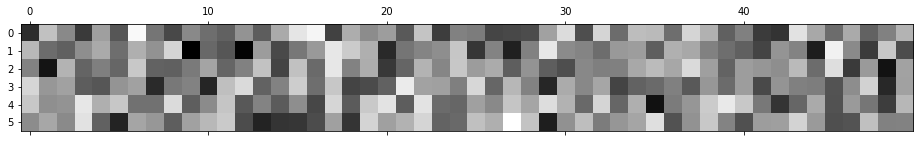

In [24]:
plt.matshow(model.get_vector('cellphones').reshape(6, 50), cmap='Greys')

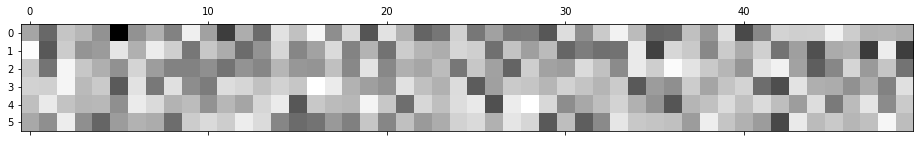

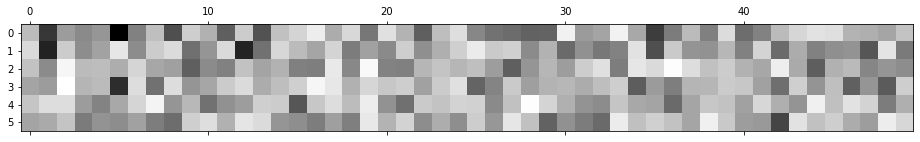

In [25]:
plt.matshow(model.get_vector('facebook').reshape(6, 50), cmap='Greys')
plt.matshow(model.get_vector('twitter').reshape(6, 50), cmap='Greys')

Many of the images in this lesson were pulled from [this amazing resource](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/).

## Create word vectors from your own corpus!

### NOTE: This will usually take a *long* time!

In [26]:
with open('alice.txt', 'r') as f:
    txt = f.read()

In [27]:
tokens = txt.lower().split(' ')

In [28]:
ltokens = [tokens]

In [29]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(ltokens,   
                 size=100,    
                 window=5,    
                 min_count=1, 
                 sg=0,        
                 workers=4)   

model.wv.most_similar("cat")

[('my', 0.9857677221298218),
 ('about', 0.9846367239952087),
 ('if', 0.9845852255821228),
 ('a', 0.9845364093780518),
 ('electronic', 0.9844448566436768),
 ('that', 0.9844133257865906),
 ('for', 0.9843364953994751),
 ('the', 0.9843310117721558),
 ('works', 0.9843294024467468),
 ('alice,', 0.9842633605003357)]

In [30]:
model.vocabulary

Check out the documentation for Gensim's implementation of [Word2Vec here](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec).